Just some imports to get out of the way

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime

%matplotlib inline

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Working with tensors

In [ ]:
n, k = 5, 5

In [ ]:
x = torch.tensor([i for i in range(25)])
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])

In [ ]:
# We can manipulate the shape of our data, adding and subtract dimensions.
x = x.reshape(5, 5)
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
x = x.reshape(5, -1)
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
x = x.unsqueeze(2)
x

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9]],

        [[10],
         [11],
         [12],
         [13],
         [14]],

        [[15],
         [16],
         [17],
         [18],
         [19]],

        [[20],
         [21],
         [22],
         [23],
         [24]]])

In [ ]:
x = x.squeeze()
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
# Some useful short hands
I = torch.eye(5)
zeros = torch.zeros((n, k))
ones = torch.ones((n, k))
ones_like = torch.ones_like(torch.tensor([_ for _ in range(k)]))

print(I, '\n')
print(zeros, '\n')
print(ones_like)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

tensor([1, 1, 1, 1, 1])


In [ ]:
x.type(torch.float)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

## How about some math

In [ ]:
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
x ** 2

tensor([[  0,   1,   4,   9,  16],
        [ 25,  36,  49,  64,  81],
        [100, 121, 144, 169, 196],
        [225, 256, 289, 324, 361],
        [400, 441, 484, 529, 576]])

In [ ]:
x + 10

tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]])

In [ ]:
1 / (x + 1)

tensor([[1.0000, 0.5000, 0.3333, 0.2500, 0.2000],
        [0.1667, 0.1429, 0.1250, 0.1111, 0.1000],
        [0.0909, 0.0833, 0.0769, 0.0714, 0.0667],
        [0.0625, 0.0588, 0.0556, 0.0526, 0.0500],
        [0.0476, 0.0455, 0.0435, 0.0417, 0.0400]])

In [ ]:
x + torch.tensor([1, 2, 3, 4, 5])

tensor([[ 1,  3,  5,  7,  9],
        [ 6,  8, 10, 12, 14],
        [11, 13, 15, 17, 19],
        [16, 18, 20, 22, 24],
        [21, 23, 25, 27, 29]])

In [ ]:
y = torch.rand(5, 5) * 25
y

tensor([[17.4801,  2.8731,  2.9257, 22.3251, 16.9522],
        [ 9.2242, 11.1593, 13.5795, 18.0300, 22.6469],
        [ 2.7975,  7.8144,  2.5628, 19.0918, 15.9372],
        [ 8.0296, 19.4077, 16.0336,  0.2744, 18.2500],
        [11.5926, 11.1574, 13.9531, 18.5294, 18.1702]])

In [ ]:
x * y

tensor([[  0.0000,   2.8731,   5.8514,  66.9753,  67.8088],
        [ 46.1210,  66.9559,  95.0568, 144.2400, 203.8223],
        [ 27.9750,  85.9581,  30.7537, 248.1930, 223.1208],
        [120.4434, 310.5225, 272.5718,   4.9384, 346.7496],
        [231.8526, 234.3049, 306.9674, 426.1766, 436.0844]])

In [ ]:
x.T

tensor([[ 0,  5, 10, 15, 20],
        [ 1,  6, 11, 16, 21],
        [ 2,  7, 12, 17, 22],
        [ 3,  8, 13, 18, 23],
        [ 4,  9, 14, 19, 24]])

## Lets work with some data

In [5]:
traindf = pd.read_csv('sample_data/california_housing_train.csv')
testdf = pd.read_csv('sample_data/california_housing_test.csv')

print(traindf[:5])

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]


In [6]:
traindf.iloc[0]

longitude              -114.3100
latitude                 34.1900
housing_median_age       15.0000
total_rooms            5612.0000
total_bedrooms         1283.0000
population             1015.0000
households              472.0000
median_income             1.4936
median_house_value    66900.0000
Name: 0, dtype: float64

In [7]:
sc = MinMaxScaler()
train_numpy  = sc.fit_transform(traindf)
test_numpy = sc.transform(testdf)

In [8]:
train_numpy[:5]

array([[1.        , 0.17534538, 0.2745098 , 0.14788454, 0.19894475,
        0.02836402, 0.07745437, 0.06853009, 0.10701193],
       [0.98406375, 0.19766206, 0.35294118, 0.20160801, 0.29484792,
        0.03155918, 0.07597435, 0.09104012, 0.13422831],
       [0.9750996 , 0.12221041, 0.31372549, 0.01892711, 0.02684668,
        0.00924914, 0.01907581, 0.07937822, 0.14577466],
       [0.97410359, 0.11689692, 0.25490196, 0.03951496, 0.05214153,
        0.01435018, 0.03700049, 0.18563882, 0.12041394],
       [0.97410359, 0.10945802, 0.37254902, 0.038276  , 0.05043451,
        0.0174052 , 0.04292057, 0.0982814 , 0.10412534]])

In [9]:
train_tensor = torch.tensor(train_numpy)
print(train_tensor[:5])

tensor([[1.0000, 0.1753, 0.2745, 0.1479, 0.1989, 0.0284, 0.0775, 0.0685, 0.1070],
        [0.9841, 0.1977, 0.3529, 0.2016, 0.2948, 0.0316, 0.0760, 0.0910, 0.1342],
        [0.9751, 0.1222, 0.3137, 0.0189, 0.0268, 0.0092, 0.0191, 0.0794, 0.1458],
        [0.9741, 0.1169, 0.2549, 0.0395, 0.0521, 0.0144, 0.0370, 0.1856, 0.1204],
        [0.9741, 0.1095, 0.3725, 0.0383, 0.0504, 0.0174, 0.0429, 0.0983, 0.1041]],
       dtype=torch.float64)


In [10]:
class CustomHousingDataset(torch.utils.data.Dataset):
  def __init__(self, file, scaler):
    self.df = pd.read_csv(file)
    self.sc = scaler

  def __len__(self):
    return self.df.shape[0]
  
  def __getitem__(self, idx):
    raw = self.df.iloc[idx].values
    if type(idx) == int:
      raw = raw.reshape(1, -1)
    raw = self.sc.transform(raw)
    data = torch.tensor(raw[:, :-1], dtype=torch.float32)
    label = torch.tensor(raw[:, -1], dtype=torch.float32)
    return data, label

In [11]:
train_data = CustomHousingDataset('sample_data/california_housing_train.csv', sc)
test_data = CustomHousingDataset('sample_data/california_housing_test.csv', sc)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [12]:
train_data[100:110]

(tensor([[0.8725, 0.0266, 0.1373, 0.0575, 0.0475, 0.0279, 0.0470, 0.4056],
         [0.8725, 0.0159, 0.5686, 0.0246, 0.0273, 0.0181, 0.0242, 0.1432],
         [0.8715, 0.0701, 0.7059, 0.0186, 0.0289, 0.0108, 0.0232, 0.1346],
         [0.8715, 0.0351, 0.0392, 0.0429, 0.0490, 0.0281, 0.0511, 0.2503],
         [0.8695, 0.0531, 0.3725, 0.0295, 0.0377, 0.0214, 0.0377, 0.1239],
         [0.8695, 0.0531, 0.3137, 0.0265, 0.0357, 0.0208, 0.0355, 0.1066],
         [0.8675, 0.0276, 0.4314, 0.0323, 0.0363, 0.0159, 0.0385, 0.1839],
         [0.8625, 0.0266, 0.3333, 0.0412, 0.0526, 0.0325, 0.0562, 0.1158],
         [0.8596, 0.0223, 0.2941, 0.0091, 0.0152, 0.0034, 0.0087, 0.1099],
         [0.8586, 0.0871, 0.3529, 0.0197, 0.0368, 0.0133, 0.0276, 0.0878]]),
 tensor([0.2988, 0.1637, 0.1186, 0.1406, 0.0969, 0.0953, 0.2268, 0.0829, 0.1495,
         0.0722]))

## LETS MODEL
We'll start by defining some basic models, loss functions, and optimizers. These are the fundamental building blocks for any Deep Learning platform.

Some common loss functions:
  - CrossEntropy
  - NLL (negative log likelihood)
  - BCE (binary cross entropy)
  - L1
  - MSE (mean sqaure error aka L2)

And for optimizers we use some form of gradient descent:
- SGD (stochastic gradient decent)
- RMSprop
- Adagrad
- Adam

Once we get here, would could also do things like schedule the learning rate, etc.

In [13]:
class FeedForward(nn.Module):
  def __init__(self):
    super(FeedForward, self).__init__()
    self.linear1 = nn.Linear(8, 32)
    self.relu1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(32, 16)
    self.relu2 = nn.LeakyReLU()
    self.linear_out = nn.Linear(16, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu1(x)
    x = self.linear2(x)
    x = self.relu2(x)
    x = self.linear_out(x)
    return x

class moreAdvanced(nn.Module):
  def __init__(self, size_in, size_out, device=device):
    super(moreAdvanced, self).__init__()
    self.linearStack = nn.Sequential(
        nn.Linear(size_in, 32),
        nn.LeakyReLU(),
        nn.Linear(32, 16),
        nn.LeakyReLU(),
        nn.Linear(16, size_out)
    )
  
  def forward(self, x):
    x = self.linearStack(x)
    return x

In [14]:
ff = FeedForward()
print(ff)

FeedForward(
  (linear1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (linear_out): Linear(in_features=16, out_features=1, bias=True)
)


In [15]:
moreAdv = moreAdvanced(8, 1)
print(moreAdv)

moreAdvanced(
  (linearStack): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(ff.parameters(), lr=1e-2)
ff.eval()
a, b = train_data[0]
with torch.no_grad():
  pred = ff(a)
print('prediction:', pred)
print('target:', b)
print('error:', loss_func(pred, b.unsqueeze(0)))

prediction: tensor([0.1199])
target: tensor(0.1070)
error: tensor(0.0002)


### This is what we want to do, over the entire training data.

In [16]:
def train(dataloader, model, loss_func, optimizer):
  model.train()
  train_loss = []
  
  now = datetime.datetime.now()
  for batch, (X, y) in enumerate(dataloader):
    # ignore the first time we see this
    # second time why is gpu better than cpu for this?
    X, y = X.to(device), y.to(device)

    # make some predictions and get the error
    pred = model(X)
    loss = loss_func(pred, y.unsqueeze(1))

    # where the magic happens
    # backpropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 10 == 0:
      loss, current = loss.item(), batch * len(X)
      iters = 10 * len(X)
      then = datetime.datetime.now()
      iters /= (then - now).total_seconds()
      print(f"loss: {loss:>6f} [{current:>5d}/{17000}] ({iters:.1f} its/sec)")
      now = then
      train_loss.append(loss)
  return train_loss

In [17]:
def test(dataloader, model, loss_func):
  size = len(dataloader)
  num_batches = 170
  model.eval()
  test_loss = 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_func(pred, y.unsqueeze(1)).item()
  test_loss /= num_batches
  print(f"Avg Loss: {test_loss:>8f}\n")
  return test_loss

In [18]:
ff = FeedForward().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(ff.parameters(), lr=1e-3)
epochs = 10
train_loss = []
test_loss = []
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------- \n")
  losses = train(train_loader, ff, loss_func, optimizer)
  train_loss.append(losses)
  test_loss.append(test(test_loader, ff, loss_func))

# Could add a condition that interrupts training when the loss doesn't change much
print('Done!')

Epoch 1
------------------------------- 

loss: 0.244189 [    0/17000] (3115.7 its/sec)
loss: 0.179380 [  640/17000] (3057.0 its/sec)
loss: 0.142579 [ 1280/17000] (3229.7 its/sec)
loss: 0.067677 [ 1920/17000] (2924.3 its/sec)
loss: 0.058138 [ 2560/17000] (3275.9 its/sec)
loss: 0.052506 [ 3200/17000] (3135.8 its/sec)
loss: 0.058938 [ 3840/17000] (3375.5 its/sec)
loss: 0.055747 [ 4480/17000] (3097.9 its/sec)
loss: 0.047196 [ 5120/17000] (3045.0 its/sec)
loss: 0.043660 [ 5760/17000] (3050.3 its/sec)
loss: 0.043456 [ 6400/17000] (2907.7 its/sec)
loss: 0.046248 [ 7040/17000] (3237.2 its/sec)
loss: 0.051971 [ 7680/17000] (3152.8 its/sec)
loss: 0.035678 [ 8320/17000] (2954.1 its/sec)
loss: 0.034829 [ 8960/17000] (3019.6 its/sec)
loss: 0.033707 [ 9600/17000] (2967.2 its/sec)
loss: 0.036343 [10240/17000] (3067.2 its/sec)
loss: 0.045530 [10880/17000] (3282.2 its/sec)
loss: 0.019790 [11520/17000] (3023.5 its/sec)
loss: 0.029848 [12160/17000] (2600.1 its/sec)
loss: 0.039057 [12800/17000] (3021.0 i

KeyboardInterrupt: ignored

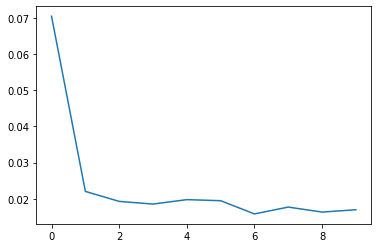

In [ ]:
plt.plot([i for i in range(len(train_loss))], torch.tensor(train_loss).mean(axis=1))

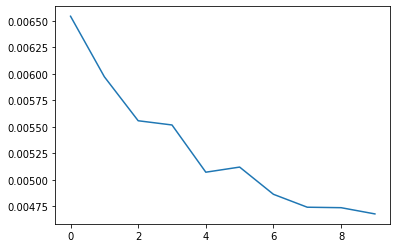

In [ ]:
plt.plot([i for i in range(len(test_loss))], test_loss)

In [ ]:
ff.eval()
with torch.no_grad():
  x, y = train_data[4]
  pred = ff(x)
  print(pred)
  print(y)
print(loss_func(pred, y.unsqueeze(1)).item())

tensor([[0.0846]])
tensor([0.1041])
0.0003818339027930051


## If there's time

In [ ]:
class evenMore(nn.Module):
  def __init__(self, s1, s2, s3):
    super(evenMore, self).__init__()
    self.m1 = moreAdvanced(s1, s2)
    self.relu1 = nn.ReLU()
    self.m2 = moreAdvanced(s2, s3)

  def forward(self, x):
    x = self.m1(x)
    x = self.relu1(x)
    x = self.m2(x)
    return x

In [ ]:
em = evenMore(8, 8, 1)
em

evenMore(
  (m1): moreAdvanced(
    (linearStack): Sequential(
      (0): Linear(in_features=8, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=8, bias=True)
    )
  )
  (relu1): ReLU()
  (m2): moreAdvanced(
    (linearStack): Sequential(
      (0): Linear(in_features=8, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=1, bias=True)
    )
  )
)